In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df_td = pd.read_csv('/kaggle/input/cicev2023/TD.csv')
df_td.head()

,id,condition,mean_time_diff,max_time_diff,min_time_diff,std_time_diff,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,0.169743,0.589876,0.013684,0.081714,2212,382.171741,5.787974
1,2-39-89-25,normal,1.603092,31.381200,0.048210,3.324224,213,404.289015,0.526851
2,2-39-139-28,attack,0.163890,0.532747,0.010949,0.084633,2323,382.171741,6.078419
3,2-39-139-28,normal,1.064143,16.803731,0.014294,2.038581,324,404.289015,0.801407
4,2-39-131-30,attack,0.169471,0.523580,0.015481,0.085875,2244,382.171741,5.871706


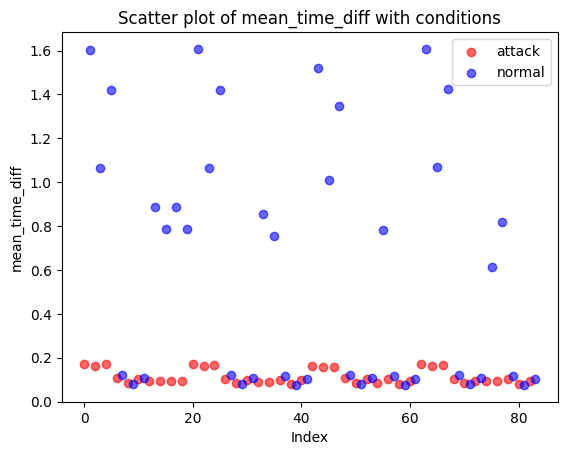

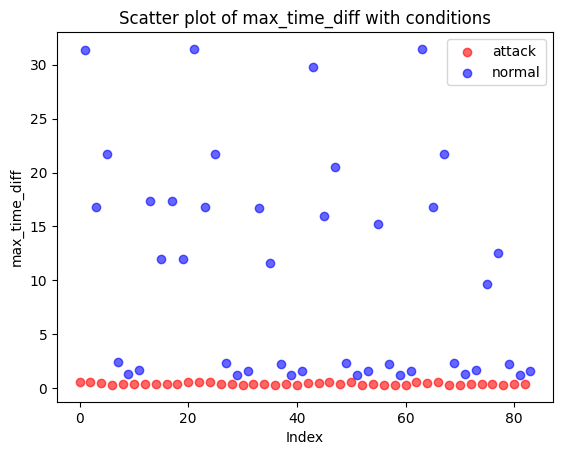

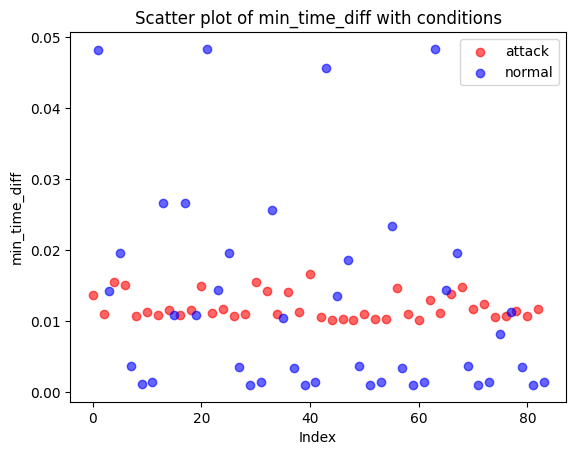

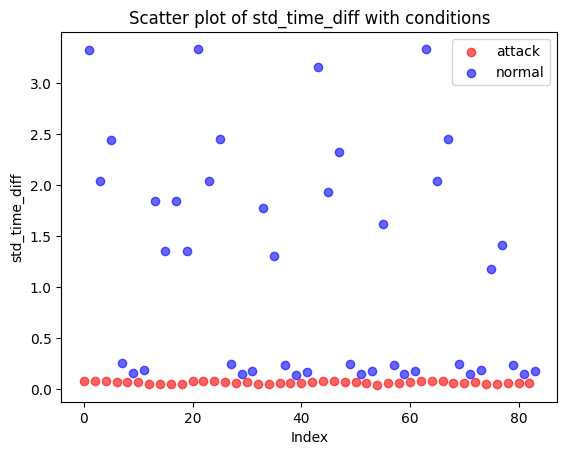

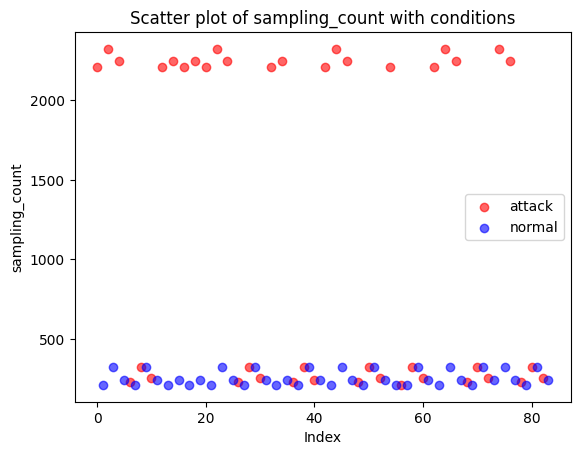

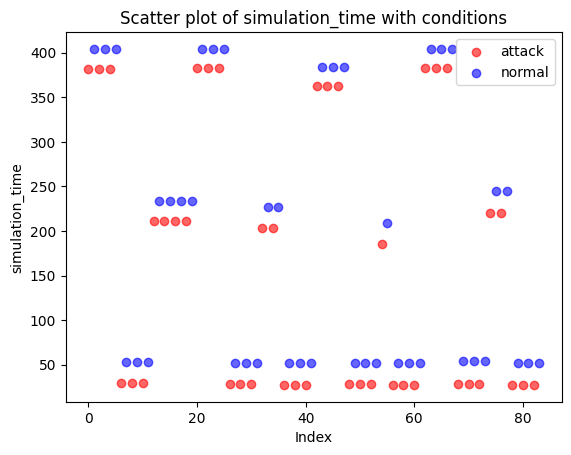

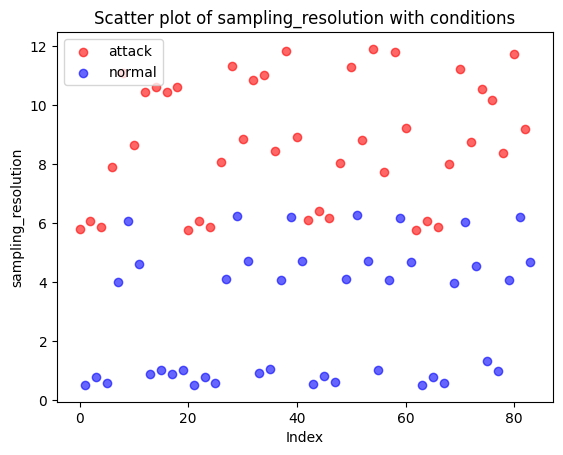

In [34]:
# Defining the features to plot
features = ['mean_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff', 'sampling_count', 'simulation_time', 'sampling_resolution']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df_td['condition'].unique():
        condition_data = df_td[df_td['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [35]:
# Remove unnecessary columns
df_td = df_td.drop(['mean_time_diff', 'sampling_count', 'simulation_time', 'min_time_diff'], axis=1)
df_td.head()

,id,condition,max_time_diff,std_time_diff,sampling_resolution
0,2-39-89-25,attack,0.589876,0.081714,5.787974
1,2-39-89-25,normal,31.381200,3.324224,0.526851
2,2-39-139-28,attack,0.532747,0.084633,6.078419
3,2-39-139-28,normal,16.803731,2.038581,0.801407
4,2-39-131-30,attack,0.523580,0.085875,5.871706


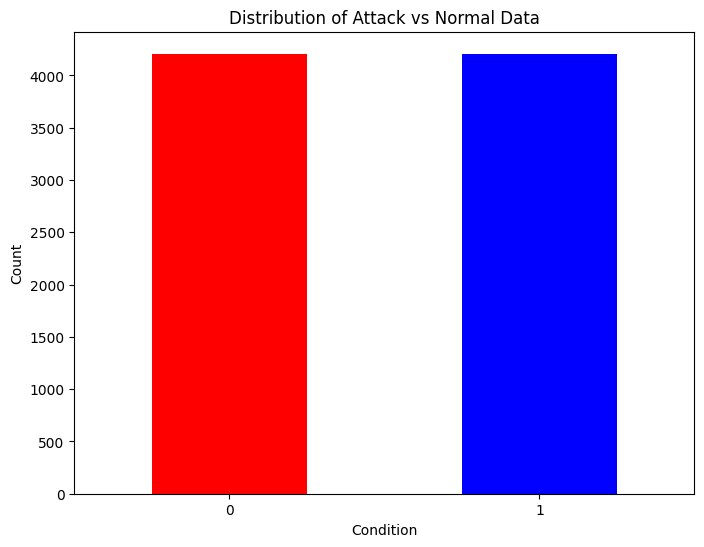

In [36]:
plt.figure(figsize=(8,6))
df['condition'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Attack vs Normal Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [37]:
df2 = pd.read_csv('/kaggle/input/cicev2023/Stat.csv')
df2

,id,condition,mean_stat,max_stat,min_stat,std_stat,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,0.996202,190.782877,0.000181,8.091443,3720,382.171741,9.733844
1,2-39-89-25,normal,0.185249,0.239669,0.129420,0.003006,3569,404.289015,8.827843
2,2-39-139-28,attack,1.737297,453.589265,0.000142,13.981088,3774,382.171741,9.875141
3,2-39-139-28,normal,0.184918,0.227282,0.144523,0.003615,3677,404.289015,9.094979
4,2-39-131-30,attack,2.489758,294.293342,0.000206,15.729606,3762,382.171741,9.843742
...,...,...,...,...,...,...,...,...,...
111,2-39-139-28,normal,0.181752,0.202069,0.143711,0.007146,478,52.198878,9.157285
112,2-39-131-30,attack,0.176157,0.223416,0.122802,0.010523,242,27.553221,8.783002
113,2-39-131-30,normal,0.183844,0.732917,0.134430,0.027733,436,52.198878,8.352670
114,GS_1,attack,0.187979,0.587974,0.080395,0.045712,250,27.553221,9.073349


In [38]:
df_gs = df2[df2['id'] == 'GS_1']
df_gs = df_gs.reset_index(drop=True)
df_gs.head()

,id,condition,mean_stat,max_stat,min_stat,std_stat,sampling_count,simulation_time,sampling_resolution
0,GS_1,attack,0.198319,0.682246,0.065531,0.038119,3739,382.171741,9.783560
1,GS_1,normal,0.368143,7.325811,0.005541,0.607536,2464,404.289015,6.094650
2,GS_1,attack,0.368143,7.325811,0.005541,0.607536,2464,29.238053,84.273737
3,GS_1,normal,0.216442,1.516652,0.018614,0.192461,421,53.209588,7.912108
4,GS_1,attack,0.207978,0.500098,0.059436,0.034140,2053,211.574530,9.703436


In [39]:
df_cs = df2[df2['id'] != 'GS_1']
df_cs = df_cs.reset_index(drop=True)
df_cs.count()

id                     84
condition              84
mean_stat              84
max_stat               84
min_stat               84
std_stat               84
sampling_count         84
simulation_time        84
sampling_resolution    84
dtype: int64

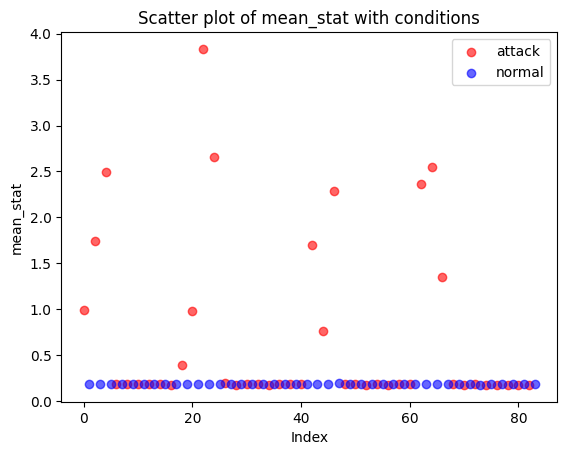

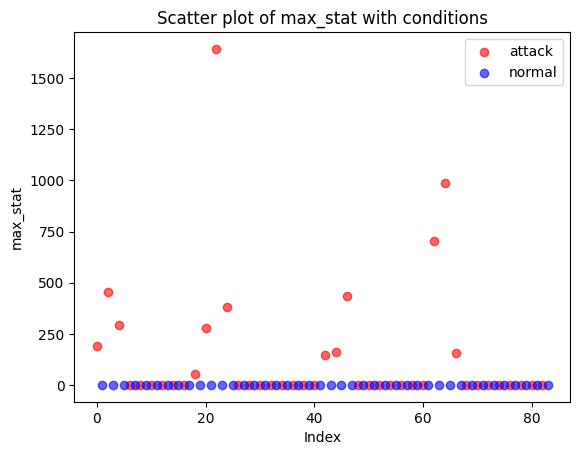

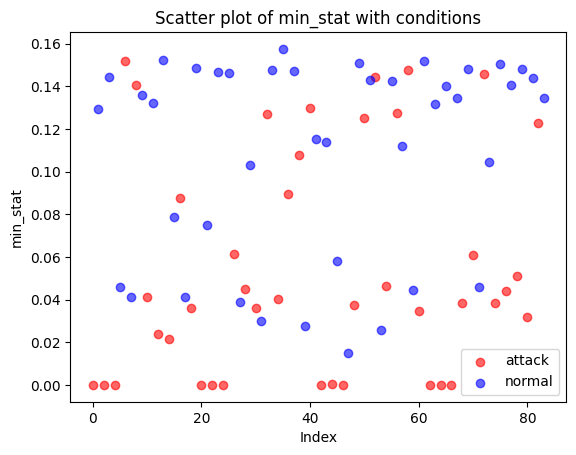

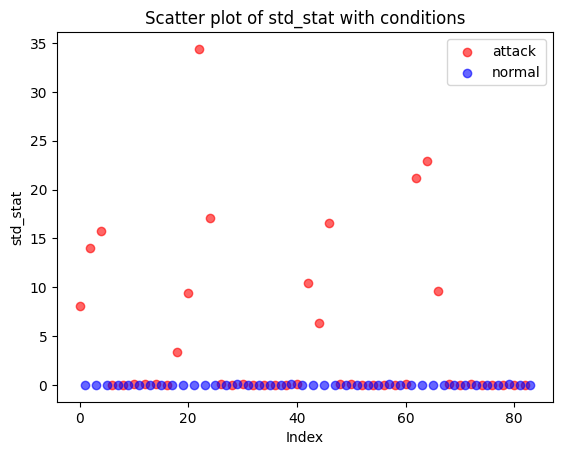

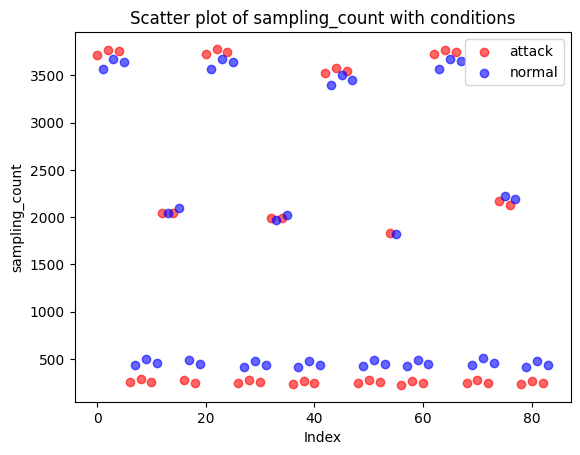

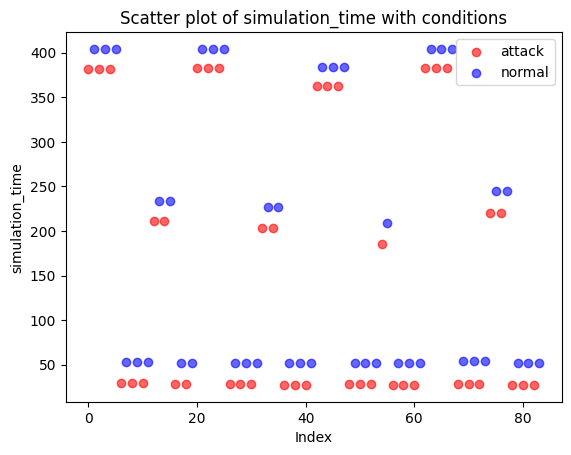

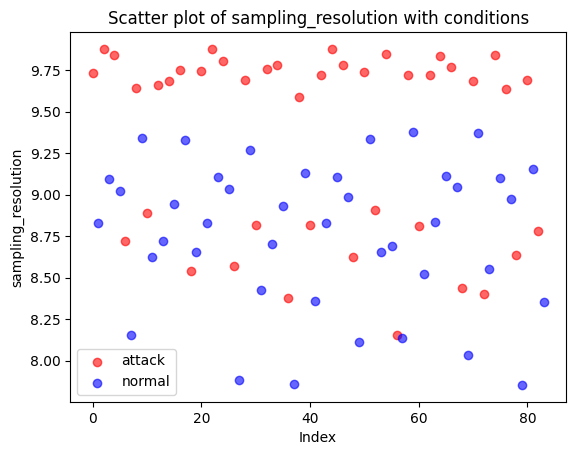

In [40]:
# Defining the features to plot
features = ['mean_stat', 'max_stat', 'min_stat', 'std_stat', 'sampling_count', 'simulation_time', 'sampling_resolution']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df2['condition'].unique():
        condition_data = df_cs[df_cs['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [41]:
df_top = pd.read_csv('/kaggle/input/cicev2023/Top.csv')
df_top.head()

,id,condition,type,field,mean_top,max_top,min_top,std_top,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,branch,ctx_sched_in,5.199200,30.25,2.44,4.847433,50,382.171741,0.130831
1,2-39-89-25,attack,branch,psi_group_change,10.306629,95.91,0.18,8.803016,350,382.171741,0.915819
2,2-39-89-25,attack,branch,visit_groups_merge.constprop.0.is,4.585862,19.04,1.98,3.356524,29,382.171741,0.075882
3,2-39-89-25,attack,branch,__update_load_avg_se,2.655700,10.28,0.03,2.114887,100,382.171741,0.261662
4,2-39-89-25,attack,branch,kmem_cache_alloc_node,4.839938,33.33,0.24,4.866055,161,382.171741,0.421277


In [42]:
df_top.isnull().sum()
df_top = df_top.dropna()

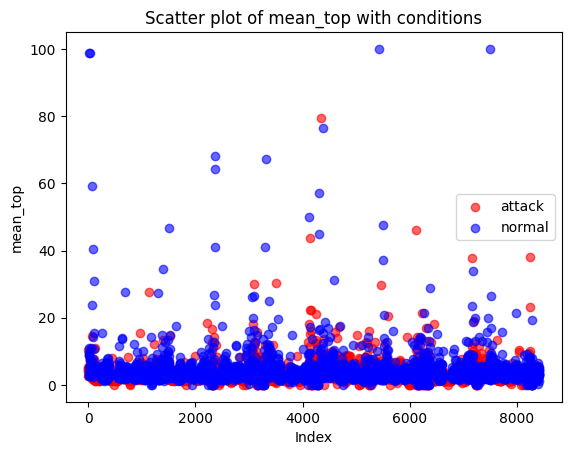

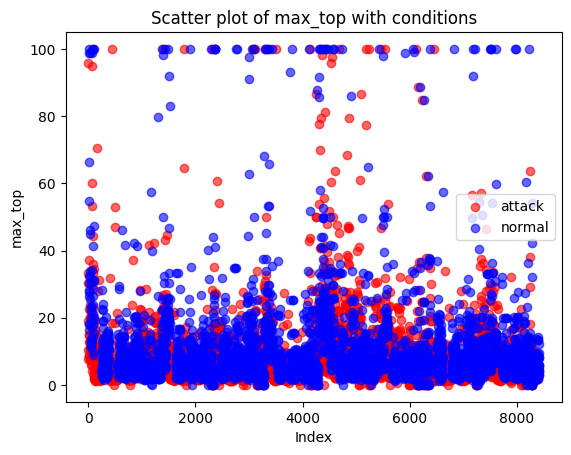

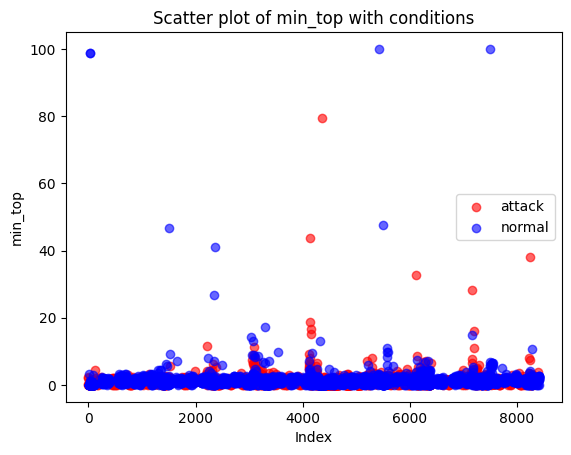

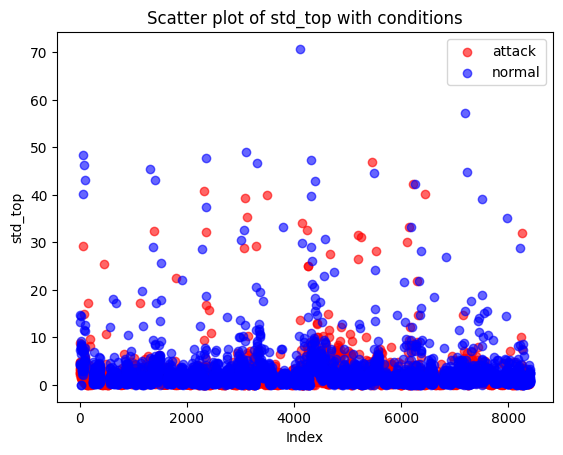

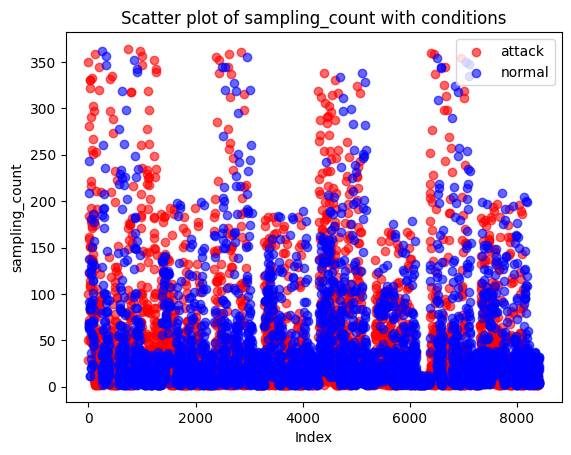

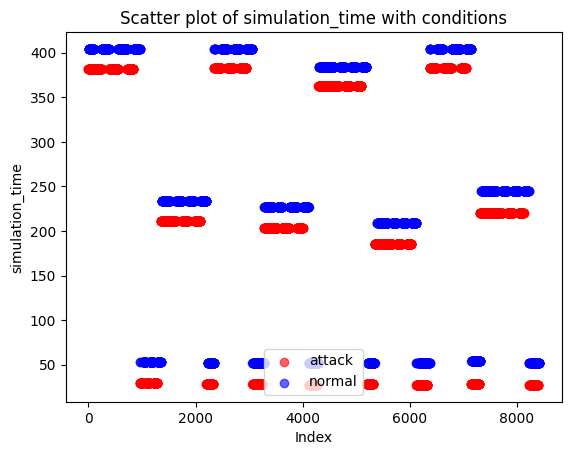

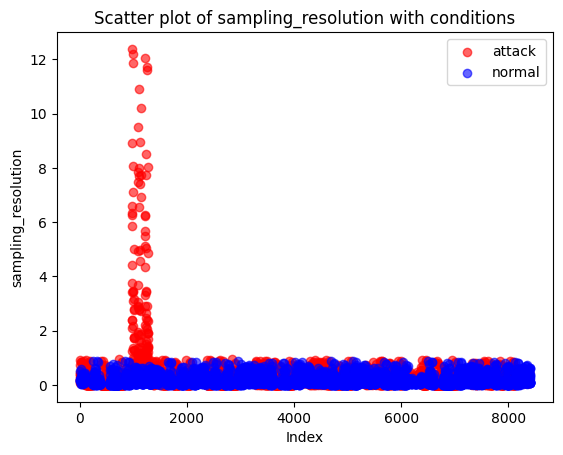

In [43]:
# Defining the features to plot
features = ['mean_top', 'max_top', 'min_top', 'std_top', 'sampling_count', 'simulation_time', 'sampling_resolution']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df_top['condition'].unique():
        condition_data = df_top[df_top['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

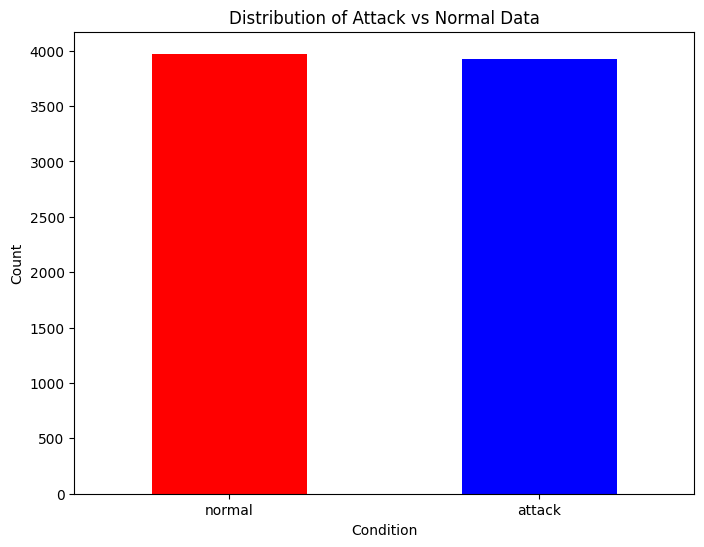

In [44]:
plt.figure(figsize=(8,6))
df_top['condition'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Attack vs Normal Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the data
df = df_top.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 units
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions (optional)
predictions = model.predict(X_test)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6200 - loss: 0.6733 - val_accuracy: 0.6633 - val_loss: 0.6190
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 0.6138 - val_accuracy: 0.6697 - val_loss: 0.5980
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.5996 - val_accuracy: 0.6986 - val_loss: 0.5933
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 0.5738 - val_accuracy: 0.7014 - val_loss: 0.5773
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.5763 - val_accuracy: 0.7095 - val_loss: 0.5723
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.5582 - val_accuracy: 0.7204 - val_loss: 0.5601
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5406 - val_accuracy: 0.7303 - val_loss: 0.5356
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.5153 - val_accuracy: 0.7538 - val_

In [51]:
from sklearn.metrics import classification_report, f1_score

# Predictions from the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(report)
print(f"F1 Score: {f1:.2f}")


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1200
           1       0.93      0.89      0.91      1168

    accuracy                           0.91      2368
   macro avg       0.91      0.91      0.91      2368
weighted avg       0.91      0.91      0.91      2368

F1 Score: 0.91
